In [1]:
os.chdir('..')

In [2]:
import model_config 
from model_packages import *
from model_utils import *

import add_counter_location_info 
import add_census_features 
import add_green_blue_infrastructure
import add_land_classification
import add_land_habitat_data
import add_dog_occupancy
import add_weather
import add_POIs
import add_strava_data
import add_counter_data


/Users/jamieelliott/.pyenv/versions/3.10.9/envs/req_old/bin/python
Confirm Pycaret version is ?
Pycaret Version:  3.0.2


ne
ndw
thames
Sandwich Peninsula  Bridge
['Banks_Lane', 'Blue_Anchor_Bay', 'Clevedon', 'Crickley_Hill_Country_Park', 'Doniford_Bridge', 'Fiddlers_Island', 'Galley_Hall', 'Holland_Haven', 'Holme_Dunes_NNR', 'Itchenor', 'Malham_Cove', 'Newlands_Corner', 'Northey_Island_Causeway', 'Ogbourne_St._George_Post', 'Rocket_Post_Field', 'Ryhope_Dene', 'Saltburn', 'Sandwich_Peninsula', 'Sandwich_Peninsula_Bridge', 'Sennen_Cove', 'Strete_Gate', 'Teesdale_Way', 'Undercliffs_Natural_Nature_Reserve', 'Vessey_Pastures', 'Walltown_Quarry', 'Wells-next-the-Sea_NNR']
Nickle Farm Chartham
['Bluebell_Hill', 'BoughtonAluph_Church', 'Brabourne_Downs', 'Capel_le_Ferne_Sound', 'Godstone', 'Hampton_Estate', 'Harrietsham', 'Hode_Ln_Patrixbourne', 'Nickle_Farm_Chartham', 'Otford', 'Reigate_Fort', 'Silent_Pool', 'Trosley_CP', 'Waldershare_Church_']
Chobham Common - Staple Hill
['Ash_Ranges_-_Gapemouth_Road_north', 'Ash_Ranges_-_Gapemouth_Road_railway_bridge', 'Ash_Ranges_-_Henley_Park', 'Ash_Ranges_-_Mychett_Place_

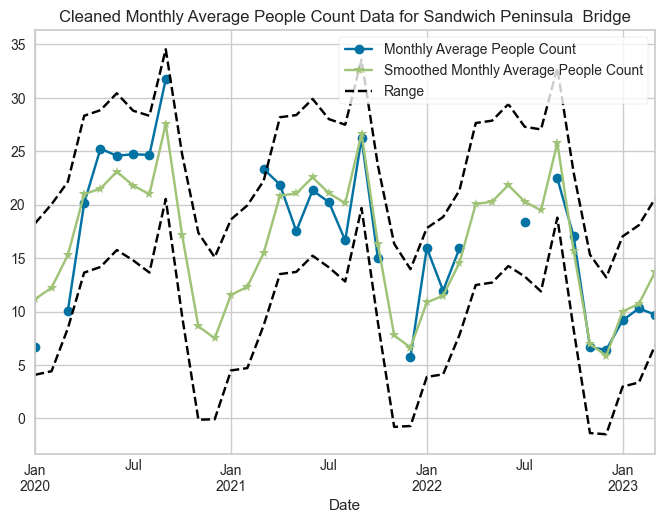

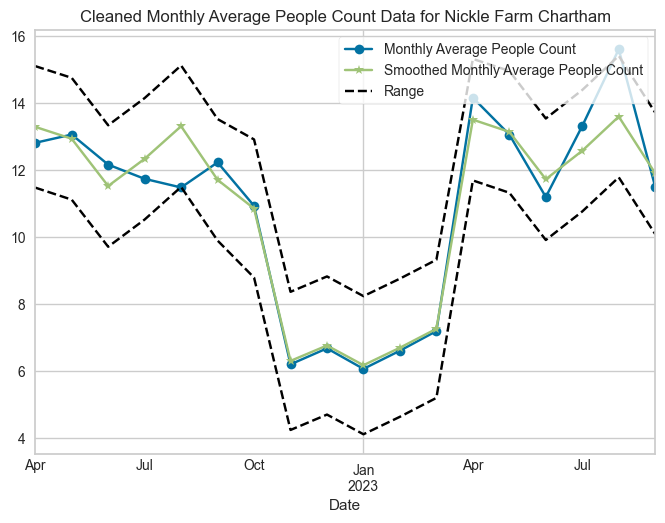

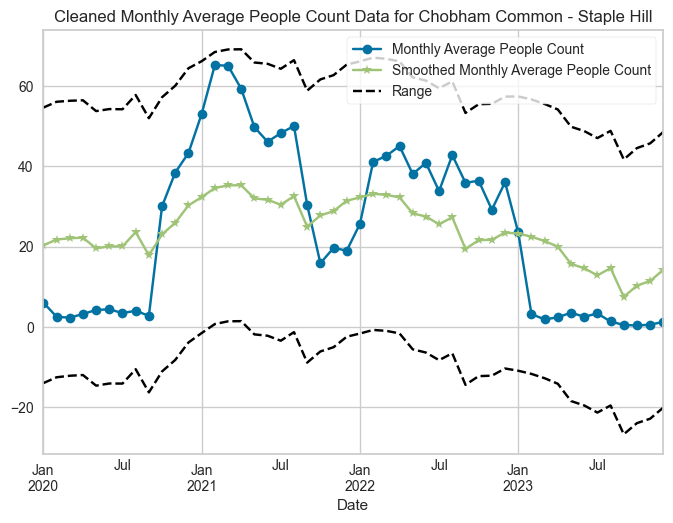

In [3]:
# import add_counter_location_info 
# import add_census_features 
# import add_green_blue_infrastructure
# import add_land_classification
# import add_land_habitat_data
# import add_dog_occupancy
# import add_weather
# import add_POIs
# import add_strava_data
# import add_counter_data




# Running each main function to generate static features data set
add_counter_location_info.main()
add_census_features.main()
add_green_blue_infrastructure.main()
add_land_classification.main()
add_land_habitat_data.main()
add_dog_occupancy.main()
add_POIs.main()

# Running main function to process the dynamic features data 
add_weather.main()

# access config file to loop through providers and datasets
config= add_counter_location_info.get_config_file_paths('./scripts/config.json')

# process people_counter data for each provider
for provider, info in config.items():
    add_counter_data.main(provider, info['pc_path'].strip("'"), info['cut_off_year'])

# process strava data for each provider
for provider, info in config.items():
    print(f'>>>>>>>>>>>>>{info["strava_path"]}')
    add_strava_data.main(provider, info['strava_path'])
    


# combine counts data for all providers
dfs=[]
for provider, info in config.items():
    df= pd.read_pickle(data_folder+f'pc_and_strava_{provider}.pkl')
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df['Date']=combined_df['Date'].astype(str)


# merge with weather features
weather= pd.read_pickle(data_folder+'weather_data.pkl')
weather['Date']=weather['Date'].astype(str)
dynamic= weather.merge(combined_df, on= ['Date', 'site'], how = 'outer')

# merge with static features
static= pd.read_pickle(data_folder+'static_data.pkl')
static_and_dynamic_features= dynamic.merge(static, left_on= 'site', right_on='counter', how= 'inner')

# save data of static and dynamic features for modelling
static_and_dynamic_features.to_pickle(data_folder+'static_and_dynamic_features.pkl')

